In [175]:
using LinearAlgebra
using Plots

In [176]:
function f1(x::Float64, α::Float64, β::Float64)
    return -2*α + β*(x^2-x)
end

function f1_solution(x::Float64)
    return x*(x-1)
end

function f2(x::Float64, α::Float64, β::Float64)
    return (α*π^2 + β)*sin(π*x)
end

function f2_solution(x::Float64)
    return sin(π*x)
end

f2_solution (generic function with 1 method)

In [177]:
function get_point(index::Int64, m::Int64)
    return convert(Float64, index/(m+1))     
end

function solution_on_points(α::Float64, β::Float64, m::Int64, f)
    exact_solution = zeros(m)
    for i in 1:m
        point = get_point(i, m)
        exact_solution[i] = f(point)::Float64
    end

    prepend!(exact_solution, f(0.0))
    append!(exact_solution, f(1.0))

    return exact_solution
end

solution_on_points (generic function with 1 method)

In [178]:
function solve_equation(α::Float64, β::Float64, m::Int64, f)

    h = 1/(m+1) 

    main_diagonal = fill(2.0*α + β*h^2, m) # Diagonal principal
    sup_diagonal = fill(-α, m-1) # Diagonal superior e inferior

    A = SymTridiagonal(main_diagonal, sup_diagonal)  # Cria a matriz tridiagonal

    b = zeros(m)
    for i in 1:m
        
        point = get_point(i, m)
        b[i] = h^2*f(point, α, β)::Float64
    end

    num_solution = A\b
    prepend!(num_solution, 0)
    append!(num_solution, 0)
    
    return num_solution
end

solve_equation (generic function with 1 method)

Caso 1

In [179]:
α = 1.0
β = 1.0
m = 4

num_sol_1 = solve_equation(α, β, m, f1)
exact_sol = solution_on_points(α, β, m, f1_solution)

display("Solução numérica: ")
display(num_sol_1)

display("Solução exata: ")
display(exact_sol)

"Solução numérica: "

6-element Vector{Float64}:
  0.0
 -0.15999999999999998
 -0.24
 -0.23999999999999994
 -0.15999999999999998
  0.0

"Solução exata: "

6-element Vector{Float64}:
 -0.0
 -0.16000000000000003
 -0.24
 -0.24
 -0.15999999999999998
  0.0

Caso 1 - Plot Soluções

In [180]:
function plot_exact_and_numerical(m::Int64, f_exact, sol_on_points)
    points = get_point.(0:m+1, m)
    plot(f_exact, range(0, 1, 100), lw=3, label="Solução Exata")
    plot!(points, sol_on_points, lw=3, seriestype=:scatter, label="Solução Numérica")

end

plot_exact_and_numerical (generic function with 1 method)

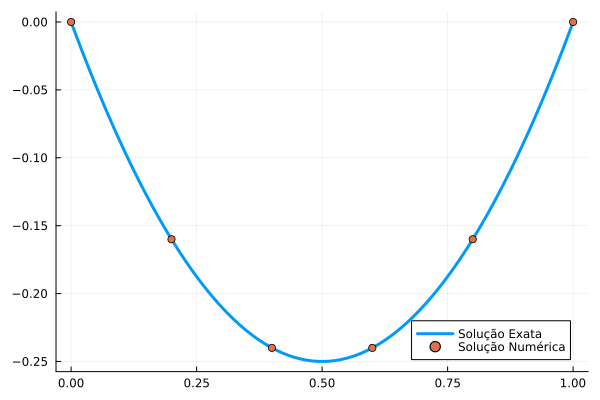

In [181]:
plot_exact_and_numerical(m, f1_solution, num_sol_1)

Caso 1 - Plot Erro

In [182]:
function plot_erro(n_testes, f_eq, f_exact)
    erros = []
    m_list = (2 .^(2:n_testes)) .- 1
    h_list = 1 ./ (m_list .+ 1)

    for m in m_list
        points = get_point.(1:m, m)

        uh = solve_equation(α, β, m, f_eq)
        u = f_exact.(points)
        prepend!(u, f_exact(0.0))
        append!(u, f_exact(1.0))    

        erro = norm(u - uh, Inf)
        push!(erros, erro)
    end

    display([h_list erros])

    plot(h_list, erros, lw=3, label="Erro", xscale = :log10, yscale = :log10, markershape=:circle)
    plot!(h_list, h_list.^2, lw=3, label="h²", xscale = :log10, yscale = :log10, legend=:topleft)
end

plot_erro (generic function with 1 method)

19×2 Matrix{Any}:
 0.25         2.77556e-17
 0.125        2.77556e-17
 0.0625       3.88578e-16
 0.03125      1.27676e-15
 0.015625     1.30451e-15
 0.0078125    2.44249e-15
 0.00390625   2.21767e-14
 0.00195312   4.49363e-14
 0.000976562  1.16851e-13
 0.000488281  9.0622e-14
 0.000244141  1.19463e-12
 0.00012207   4.47695e-12
 6.10352e-5   9.10022e-13
 3.05176e-5   4.56901e-12
 1.52588e-5   1.38194e-10
 7.62939e-6   1.46899e-10
 3.8147e-6    1.64103e-9
 1.90735e-6   3.61146e-8
 9.53674e-7   1.98238e-8

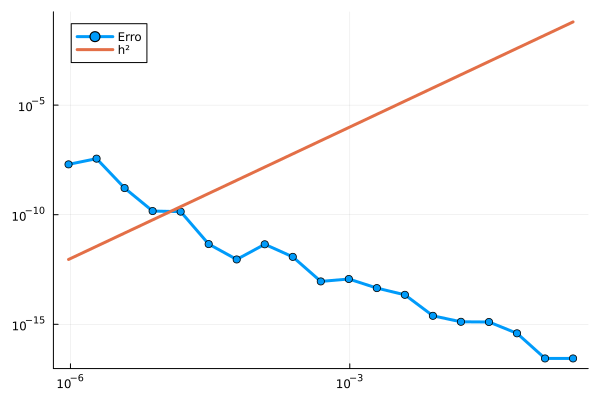

In [183]:
n_testes = 20
plot_erro(n_testes, f1, f1_solution)

Caso 2

In [184]:
α = 1.0
β = 1.0
m = 7

num_sol_2 = solve_equation(α, β, m, f2)
exact_sol = solution_on_points(α, β, m, f2_solution)

display("Solução numérica: ")
display(num_sol_2)

display("Solução exata: ")
display(exact_sol)

"Solução numérica: "

9-element Vector{Float64}:
 0.0
 0.3871781595774367
 0.7154119541379651
 0.9347307639065021
 1.0117452882257492
 0.9347307639065022
 0.7154119541379653
 0.38717815957743673
 0.0

"Solução exata: "

9-element Vector{Float64}:
 0.0
 0.3826834323650898
 0.7071067811865475
 0.9238795325112867
 1.0
 0.9238795325112867
 0.7071067811865476
 0.3826834323650899
 1.2246467991473532e-16

Caso 2 - Plot

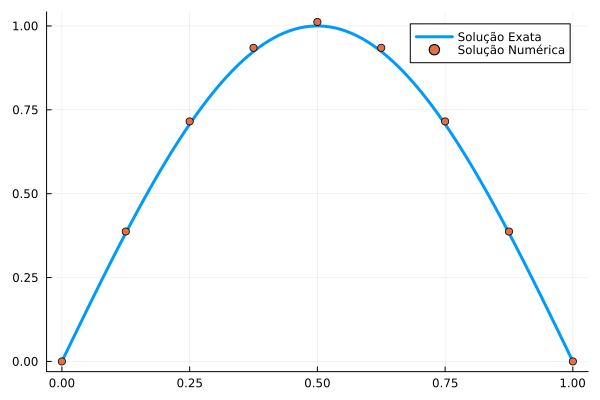

In [185]:
plot_exact_and_numerical(m, f2_solution, num_sol_2)

Caso 2 - Plot Erro

19×2 Matrix{Any}:
 0.25         0.0479168
 0.125        0.0117453
 0.0625       0.00292196
 0.03125      0.000729595
 0.015625     0.000182343
 0.0078125    4.55822e-5
 0.00390625   1.13953e-5
 0.00195312   2.84882e-6
 0.000976562  7.12204e-7
 0.000488281  1.78051e-7
 0.000244141  4.45162e-8
 0.00012207   1.11428e-8
 6.10352e-5   2.78447e-9
 3.05176e-5   6.96922e-10
 1.52588e-5   3.74505e-10
 7.62939e-6   5.34526e-10
 3.8147e-6    6.56058e-9
 1.90735e-6   1.44238e-7
 9.53674e-7   8.54365e-8

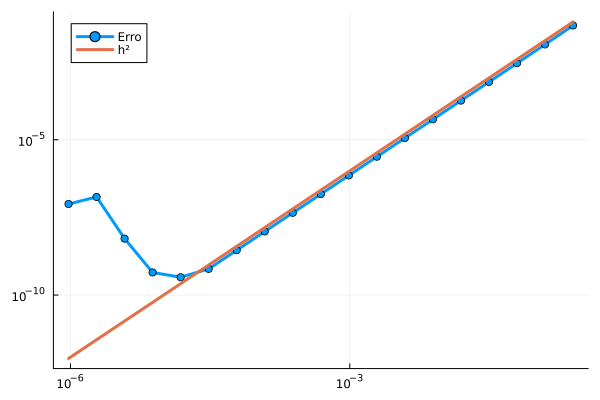

In [186]:
n_testes = 20
plot_erro(n_testes, f2, f2_solution)

In [187]:
function monta_K(α::Float64, β::Float64, m::Int64)
    h = 1/(m+1) 

    diag_principal = fill(2.0*α/h + 2.0*β*h/3.0, m)     # Diagonal principal
    diag_superior_infeiror  = fill(-α/h + β*h/6.0, m-1) # Diagonal superior e inferior

    K = SymTridiagonal(diag_principal, diag_superior_infeiror)  # Cria a matriz tridiagonal


    return K
    
end

function solve_via_galerkin_1(α::Float64, β::Float64, m::Int64, K::SymTridiagonal{Float64}, f)

    h = 1/(m+1) 

    b = zeros(m)
    for i in 1:m
        b[i] = 8*h

    end

    num_solution = K\b

    prepend!(num_solution, 0)
    append!(num_solution, 0)
    
    return num_solution
end

function solve_via_galerkin_2(α::Float64, β::Float64, m::Int64, K::SymTridiagonal{Float64}, f)

    h = 1/(m+1) 

    b = zeros(m)
    points = get_point.(1:m, m)
    
    for i in 1:m
        b[i] = h*points[i]
    end

    num_solution = K\b

    prepend!(num_solution, 0)
    append!(num_solution, 0)
    
    return num_solution
end

solve_via_galerkin_2 (generic function with 2 methods)

In [188]:
function f3(x::Float64, α::Float64, β::Float64)
    return 8.0::Float64
end

function f3_solution(x::Float64)
    return -4*x*(x-1)::Float64
end

function f4(x::Float64, α::Float64, β::Float64)
    return x::Float64
end

function f4_solution(x::Float64)
    return x+(exp(-x) - exp(x))/(exp(1) - exp(-1)) ::Float64
end

f4_solution (generic function with 1 method)

Caso 3 - plot

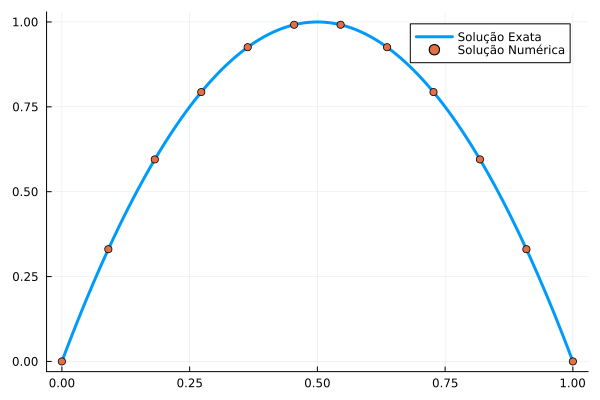

In [189]:
m = 10
α = 1.0
β = 0.0
K = monta_K(α, β, m)
galerkin_sol_3 = solve_via_galerkin_1(α, β, m, K, f3)

points = get_point.(0:m+1, m)

plot_exact_and_numerical(m, f3_solution, galerkin_sol_3)

19×2 Matrix{Any}:
 0.25         1.11022e-16
 0.125        2.22045e-16
 0.0625       2.22045e-16
 0.03125      5.9952e-15
 0.015625     1.16573e-14
 0.0078125    5.9952e-15
 0.00390625   1.45439e-14
 0.00195312   1.09468e-13
 0.000976562  2.72782e-13
 0.000488281  4.28546e-13
 0.000244141  4.32021e-12
 0.00012207   9.85168e-12
 6.10352e-5   7.53708e-12
 3.05176e-5   5.17101e-11
 1.52588e-5   1.18841e-10
 7.62939e-6   5.14755e-10
 3.8147e-6    9.305e-9
 1.90735e-6   1.52787e-7
 9.53674e-7   2.52658e-7

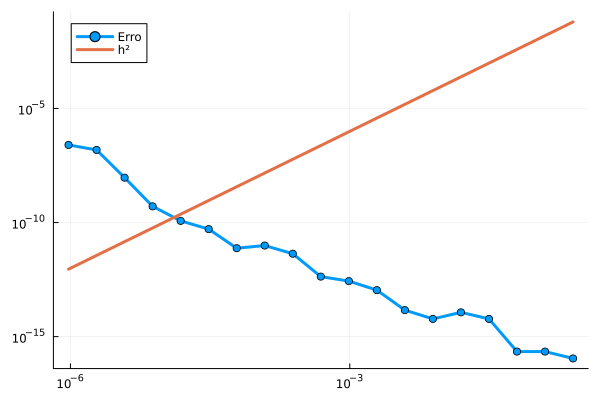

In [190]:
n_testes = 20
plot_erro(n_testes, f3, f3_solution)

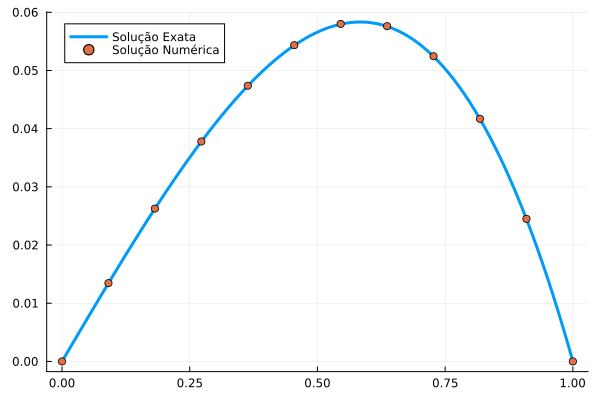

In [195]:
m = 10
α = 1.0
β = 1.0
K = monta_K(α, β, m)
galerkin_sol_4 = solve_via_galerkin_2(α, β, m, K, f4)

plot_exact_and_numerical(m, f4_solution, galerkin_sol_4)

19×2 Matrix{Any}:
 0.25         0.000264735
 0.125        6.85766e-5
 0.0625       1.72054e-5
 0.03125      4.3176e-6
 0.015625     1.0795e-6
 0.0078125    2.69881e-7
 0.00390625   6.7474e-8
 0.00195312   1.68685e-8
 0.000976562  4.21717e-9
 0.000488281  1.05429e-9
 0.000244141  2.63476e-10
 0.00012207   6.48078e-11
 6.10352e-5   1.63828e-11
 3.05176e-5   3.88357e-12
 1.52588e-5   3.50996e-11
 7.62939e-6   2.95445e-11
 3.8147e-6    3.99285e-10
 1.90735e-6   8.49059e-9
 9.53674e-7   5.03979e-9

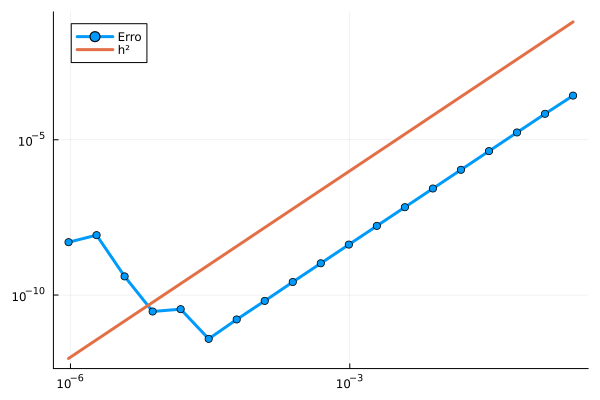

In [196]:
n_testes = 20
plot_erro(n_testes, f4, f4_solution)